In [2]:
import geopandas as gpd
import geojson
import json

In [6]:
#illinois = gpd.read_file('Illinois_blocks.json')

In [7]:
#illinois.head()

# Extract Chicago rows using Chicago tract information [in the pdf.](https://www.chicago.gov/content/dam/city/depts/fin/municipal_depository/Addendum_2_Attachment_A_Chicago_Census_Tract%20_11_digit.pdf)


In [16]:
import pandas as pd

tract_information = pd.read_csv('/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/data/11-Digit Chicago Census Tract.csv')

In [9]:
#print(tract_information.dtypes)


In [10]:
#tract_information.head()

In [11]:
#len(tract_information)

In [17]:
# clean data
cleaned_tract_information = tract_information[pd.to_numeric(tract_information.iloc[:, 0], errors='coerce').notnull()]
#cleaned_tract_information.head()


In [18]:
# rename columns
column_names = {'Unnamed: 0':'counts', 'Addendum # 2 - Attachment A':'digits'}
tracts = cleaned_tract_information.rename(columns=column_names)
#tracts.head()

We have Chicago census tracts now, and we will remove the rows of Illinois block data in which tract columns do not match with the digits in tracts data.

In [15]:
#chicago = illinois[(illinois['GEOID20']).str[:11].isin(tracts['digits'])]


In [16]:
#len(chicago)

In [17]:
#chicago.head()

# Save and Plot Chicago Census Blocks

In [18]:
# Convert GeoDataFrame to GeoJSON format
#chicago_geojson = chicago.to_json()

# Write GeoJSON to a JSON file
#with open('chicago.json', 'w') as f:
#    f.write(chicago_geojson)

Since we saved chicago data as a json file, we do not need the previous codes anymore.

We read saved chicago.json file below.

<Axes: >

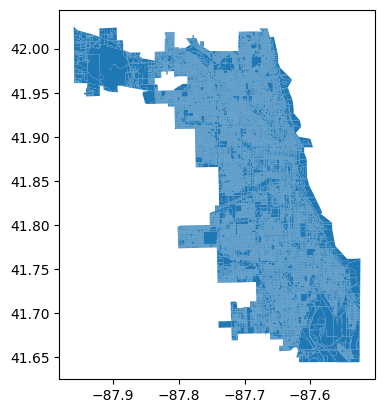

In [14]:
import matplotlib as plt

chicago = gpd.read_file('/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/data/chicago.json')
chicago.plot()

In [20]:
chicago.head()

,id,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,22984,17,043,840000,2019,170438400002019,Block 2019,G5040,R,,,S,39074,0,+41.9862251,-087.9375858,"POLYGON ((-87.93907 41.98668, -87.93906 41.985..."
1,22985,17,043,840000,2001,170438400002001,Block 2001,G5040,R,,,S,0,12850,+41.9880794,-087.9352896,"POLYGON ((-87.93907 41.98671, -87.93907 41.986..."
2,22986,17,043,840000,2020,170438400002020,Block 2020,G5040,R,,,S,22015,0,+41.9846582,-087.9380860,"POLYGON ((-87.93906 41.98510, -87.93906 41.985..."
3,22987,17,043,840000,2017,170438400002017,Block 2017,G5040,R,,,S,3015,0,+41.9866580,-087.9434952,"POLYGON ((-87.94017 41.98669, -87.94020 41.986..."
4,22989,17,043,840000,2021,170438400002021,Block 2021,G5040,R,,,S,33305,235,+41.9785082,-087.9395576,"POLYGON ((-87.93978 41.98381, -87.93978 41.983..."


In [21]:
chicago.columns

Index(['id', 'STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLOCKCE20', 'GEOID20',
       'NAME20', 'MTFCC20', 'UR20', 'UACE20', 'UATYPE20', 'FUNCSTAT20',
       'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry'],
      dtype='object')

# Dual Graph of Census blocks by Gerrychain Library

In [5]:
from gerrychain import Graph
import networkx as nx
import random
import pandas as pd

In [ ]:
#df = chicago

#df.plot()
#plt.axis('off')
#plt.show()

#df['C_X'] = df.centroid.x
#df['C_Y'] = df.centroid.y

#graph = Graph.from_geodataframe(chicago)

#nx.draw(graph,pos={x:(graph.nodes()[x]['C_X'],graph.nodes()[x]['C_Y']) for x in graph.nodes()},node_size=20)
#plt.show()

#graph.to_json("GraphToJson.json")

We saved the graph as a json file called "GraphToJson.json".

We do not need to produce it anymore. We read the saved file below.

- The areas of the polygons are included as node attributes (with key `area`).
        
- The shared perimeter of neighboring polygons are included as edge attributes (with key `shared_perim`).

- Nodes corresponding to polygons on the boundary of the union of all the geometries (e.g., the state, if your dataframe describes VTDs) have a    `boundary_node` attribute (set to `True`) and a `boundary_perim` attribute
with the length of this "exterior" boundary.

- Gerrychain library has centroid function.

# Json File Details

In [24]:
graph = Graph.from_json("/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/data/GraphToJson.json")

In [26]:
# Opening JSON file
f = open('GraphToJson.json')

# returns JSON object as a dictionary
data = json.load(f)

data.keys()

dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'adjacency'])

In [27]:
adjacency = random.choice(list(data['adjacency']))
adjacency

[{'shared_perim': 0.0006020408314612556, 'id': 34998},
 {'shared_perim': 0.00016608306642686848, 'id': 33486},
 {'shared_perim': 0.00038422004144462665, 'id': 15353},
 {'shared_perim': 0.0005483032482108406, 'id': 34997},
 {'shared_perim': 0.0012081196132888092, 'id': 37938},
 {'shared_perim': 0.0006070528392981048, 'id': 17236}]

In [27]:
node = random.choice(list(graph.nodes))
graph[node]

AtlasView({22355: {'shared_perim': 0.0011810342924767159}, 22357: {'shared_perim': 0.0011800084835331673}, 22358: {'shared_perim': 0.0004440721498576226}, 33862: {'shared_perim': 0.000439055805109123}})

In [32]:
graph.nodes[node]['GEOID20'] 

'170311002002003'

# Node Attributes

In [25]:
first_node = list(graph.nodes)[0]
node_attributes = graph.nodes[first_node]
print(f"Attributes for node {first_node}: {node_attributes}")

Attributes for node 0: {'boundary_node': False, 'area': 4.2451625000051164e-06, 'STATEFP20': '17', 'COUNTYFP20': '043', 'TRACTCE20': '840000', 'BLOCKCE20': '2019', 'GEOID20': '170438400002019', 'NAME20': 'Block 2019', 'MTFCC20': 'G5040', 'UR20': 'R', 'UACE20': '', 'UATYPE20': '', 'FUNCSTAT20': 'S', 'ALAND20': 39074, 'AWATER20': 0, 'INTPTLAT20': '+41.9862251', 'INTPTLON20': '-087.9375858', 'C_X': -87.93758577847642, 'C_Y': 41.986225138107365}


In [7]:
dhc_data = pd.read_csv('data/dhc_2020.csv')

In [8]:
dhc_data.columns

Index(['GEOID20', 'STATEFP20', 'STATE', 'COUNTYFP20', 'COUNTY', 'TOT_POP',
       'URBAN', 'RURAL', 'NOT_DEF', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'MALE', 'U5_M', '5_9_M', '10_14_M', '15_17_M', '18_19_M', '20_M',
       '21_M', '22_24_M', '25_29_M', '30_34_M', '35_39_M', '40_44_M',
       '45_49_M', '50_54_M', '55_59_M', '60_61_M', '62_64_M', '65_66_M',
       '67_69_M', '70_74_M', '75_79_M', '80_84_M', '85_O_M', 'FEMALE', 'U5_F',
       '5_9_F', '10_14_F', '15_17_F', '18_19_F', '20_F', '21_F', '22_24_F',
       '25_29_F', '30_34_F', '35_39_F', '40_44_F', '45_49_F', '50_54_F',
       '55_59_F', '60_61_F', '62_64_F', '65_66_F', '67_69_F', '70_74_F',
       '75_79_F', '80_84_F', '85_O_F', 'IN_HH_POP', 'HH_IN_HH', 'M_HH',
       'M_ALONE', 'M_N_ALONE', 'F_HH', 'F_ALONE', 'F_N_ALONE', 'O_SEX_MAR',
       'S_SEX_MAR', 'O_SEX_UMAR', 'S_SEX_UMAR', 'BIO_CHLD', 'BIO_U18',
       'ADPT_CHLD', 'ADPT_U18', 'STEP_CHLD', 'STEP_U18', 'GRAND_CHLD',
       'GRAND_U18', 'SIBLING', 'PARENT', 'PAR

In [26]:
dhc_data.head()

,GEOID20,STATEFP20,STATE,COUNTYFP20,COUNTY,TOT_POP,URBAN,RURAL,NOT_DEF,MED_AGE,...,SIBLING,PARENT,PAR_INLAW,CHLD_INLAW,OTH_REL,FSTR_CHLD,OTH_NONREL,GRP_QUART,GRP_INST,GRP_N_INST
0,171990209003065,17,Illinois,17199,Williamson County,54,0,54,0,52.0,...,0,0,0,0,0,0,1,0,0,0
1,171990209003062,17,Illinois,17199,Williamson County,3,3,0,0,16.5,...,0,0,0,0,0,0,0,0,0,0
2,171990209003063,17,Illinois,17199,Williamson County,14,14,0,0,47.5,...,0,0,0,0,0,0,0,0,0,0
3,171990209003064,17,Illinois,17199,Williamson County,26,26,0,0,59.5,...,0,0,0,0,0,0,1,0,0,0
4,171990209003066,17,Illinois,17199,Williamson County,175,175,0,0,46.7,...,0,2,0,0,0,0,2,0,0,0


Use dhc data and chicago data to construct your own graph by the test code.

For the area, shared perimeters and neighborhood, we can use gerrychain.

In [31]:
#lookup(node: Any, field: Any)

#Lookup a node/field attribute.
#Returns the value of the attribute field at node.

# Matching population data with the nodes of Chicago block graph

In [9]:
len(dhc_data)

369978

In [40]:
len(graph.nodes)

39521

In [38]:
# Convert GEOID20 to string
dhc_data['GEOID20'] = dhc_data['GEOID20'].astype(str)

# Now perform your filtering operation
chicago_dhc = dhc_data[dhc_data['GEOID20'].str[:11].isin(tracts['digits'])]
chicago_dhc

,GEOID20,STATEFP20,STATE,COUNTYFP20,COUNTY,TOT_POP,URBAN,RURAL,NOT_DEF,MED_AGE,...,SIBLING,PARENT,PAR_INLAW,CHLD_INLAW,OTH_REL,FSTR_CHLD,OTH_NONREL,GRP_QUART,GRP_INST,GRP_N_INST
67447,170438400002021,17,Illinois,17043,DuPage County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0
67448,170438400002022,17,Illinois,17043,DuPage County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0
67449,170438400002023,17,Illinois,17043,DuPage County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0
67450,170438400002024,17,Illinois,17043,DuPage County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0
67451,170438400002025,17,Illinois,17043,DuPage County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256606,170318422001047,17,Illinois,17031,Cook County,384,384,0,0,38.0,...,0,8,1,0,3,0,7,0,0,0
256607,170318422001048,17,Illinois,17031,Cook County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0
256608,170318422001049,17,Illinois,17031,Cook County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0
256609,170318422001050,17,Illinois,17031,Cook County,0,0,0,0,-666666666.0,...,0,0,0,0,0,0,0,0,0,0


- Both Chicago_dhc and graph.nodes have the same lengths. They match.

In [43]:
# Create a dictionary from the DataFrame for faster lookup
df_dict = chicago_dhc.set_index('GEOID20')['TOT_POP'].to_dict()

for node in graph.nodes:
    geoid = graph.nodes[node].get('GEOID20')
    if geoid in df_dict:
        graph.nodes[node]['pop'] = df_dict[geoid]
        
# write this as a function in graph folder to add any column of data as node attribute.

See in API that

classgerrychain.partition.GeographicPartition

crosses_parts(edge: Tuple)→ bool

flip(flips: Dict)→ Partition

plot(geometries=None, **kwargs)

# YAPILACAKLAR

2. Stop, possible, existing attributelari belirle. False or True.

3. Her nodun geometrisine kolay ulasabilecegin bir fonksiyon.

4. Plot file olustur.


# CTA Data Information

agency.txt - basic agency information

stops.txt - list of stop locations for bus and train, also includes parent station info for trains

routes.txt - route list with unique identifiers

trips.txt - has information about each trip taken by a CTA vehicle

stop_times.txt - scheduled arrival/departure times for each stop on each trip

calendar.txt - defines which service IDs operate on which days

calendar_dates.txt - has exceptions to calendar (such as a holiday when a Sunday schedule is operated)

shapes.txt - defines how to draw a route line on a map

frequencies.txt - defines headways when trips aren't specifically scheduled, but sent as-needed (such as service that follows a major event)

transfers.txt - has additional information to guide trip planners into identifying two stops as a transfer point and how much extra time to give people to transfer between services

1. $\text{stops.txt}$

 stop_id, latitude and longitude columnlarini kullanarak duraklarin konumlarini belirle. key: stop_id, value: (latitude, longitude)

In [45]:
import pandas

calendar = pandas.read_csv('/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/google_transit/calendar.txt')

In [46]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,66201,1,1,1,1,1,0,0,20240130,20240331
1,66202,1,1,1,1,0,0,0,20240130,20240331
2,66203,0,1,1,1,1,0,0,20240130,20240331
3,66204,0,1,1,1,1,0,0,20240130,20240331
4,66205,0,0,0,0,1,0,0,20240130,20240331


In [47]:
frequencies = pandas.read_csv('/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/google_transit/frequencies.txt')
frequencies.head()

,trip_id,start_time,end_time,headway_secs


In [48]:
routes = pandas.read_csv('/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/google_transit/routes.txt')
routes.head()

,route_id,route_short_name,route_long_name,route_type,route_url,route_color,route_text_color
0,1,1,Bronzeville/Union Station,3,http://www.transitchicago.com/bus/1/,565a5c,ffffff
1,2,2,Hyde Park Express,3,http://www.transitchicago.com/bus/2/,b71234,ffffff
2,3,3,King Drive,3,http://www.transitchicago.com/bus/3/,565a5c,ffffff
3,4,4,Cottage Grove,3,http://www.transitchicago.com/bus/4/,565a5c,ffffff
4,X4,X4,Cottage Grove Express,3,http://www.transitchicago.com/bus/X4/,b71234,ffffff


In [49]:
# defines how to draw a route line on a map
shapes = pandas.read_csv('/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/google_transit/shapes.txt')
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,66200095,41.911304,-87.631222,1,0
1,66200095,41.911304,-87.631222,2,13
2,66200095,41.911270,-87.631234,3,24
3,66200095,41.911250,-87.631264,4,33
4,66200095,41.911237,-87.631294,5,52


In [50]:
stop_times = pandas.read_csv('google_transit/stop_times.txt')
stop_times.head()

# trip_id: 	Identifies a trip.

# arrival_time: Arrival time at a specific stop for a specific trip on a route. If there are not separate times for arrival and departure at a stop,
#               enter the same value for arrival_time and departure_time. Scheduled stops where the vehicle strictly adheres to the specified arrival and
#               departure times are timepoints. If this stop is not a timepoint, it is recommended to provide an estimated or interpolated time. If this is not available, arrival_time can be left empty.

# stop_id: Identifies the serviced stop. All stops serviced during a trip must have a record in stop_times.txt. Referenced locations must be stops, not stations or station entrances.
#          A stop may be serviced multiple times in the same trip, and multiple trips and routes may service the same stop.

# stop_sequence: Order of stops for a particular trip. The values must increase along the trip but do not need to be consecutive.
#                Example: The first location on the trip could have a stop_sequence=1, the second location on the trip could have a stop_sequence=23, the third location could have a stop_sequence=40, and so on.

# pickup_type: Indicates pickup method. Valid options are:
#              0 or empty - Regularly scheduled pickup.
#              1 - No pickup available.
#              2 - Must phone agency to arrange pickup.
#              3 - Must coordinate with driver to arrange pickup.

# drop_off_type: 0 or empty - Regularly scheduled drop off.

# shape_dist_traveled: Actual distance traveled along the associated shape, from the first stop to the stop specified in this record. This field specifies how much of the shape to draw between any two stops during a trip.
#                      Must be in the same units used in shapes.txt. Values used for shape_dist_traveled must increase along with stop_sequence; they cannot be used to show reverse travel along a route.

FileNotFoundError: [Errno 2] No such file or directory: 'google_transit/stop_times.txt'

In [ ]:
stop_times.shape
#deleted. Huge data.

In [ ]:
stops = pandas.read_csv('/Users/kirtisoglu/Documents/GitHub/Allocation-of-Primary-Care-Centers-in-Chicago/google_transit 18-03-07-885/stops.txt')
stops.head()

In [ ]:
transfers = pandas.read_csv('google_transit/transfers.txt')
transfers.head()

# from_stop_id: Identifies a stop or station where a connection between routes begins. If this field refers to a station, the transfer rule applies to all its child stops.
# to_stop_id: Identifies a stop or station where a connection between routes ends. If this field refers to a station, the transfer rule applies to all child stops.
# transfer_type: Indicates the type of connection for the specified (from_stop_id, to_stop_id) pair.
#    0 or empty - Recommended transfer point between routes.
#    1 - Timed transfer point between two routes. The departing vehicle is expected to wait for the arriving one and leave sufficient time for a rider to transfer between routes.
#    2 - Transfer requires a minimum amount of time between arrival and departure to ensure a connection. The time required to transfer is specified by min_transfer_time.
#    3 - Transfers aren't possible between routes at the location.
#    4 - Passengers can stay onboard the same vehicle to transfer from one trip to another (an "in-seat transfer").
#    5 - In-seat transfers aren't allowed between sequential trips. The passenger must alight from the vehicle and re-board.

In [ ]:
transfers

In [ ]:
trips = pandas.read_csv('google_transit/trips.txt')
trips.head()

# route_id: Identifies a route.
# service_id: Identifies a set of dates when service is available for one or more routes.
# trip_id: Identifies a trip.
# direction_id: Indicates the direction of travel for a trip. 0 - Travel in one direction (e.g. outbound travel). 1 - Travel in the opposite direction (e.g. inbound travel).
# block_id: Identifies the block to which the trip belongs. A block consists of a single trip or many sequential trips made using the same vehicle,
#   defined by shared service days and block_id. A block_id can have trips with different service days, making distinct blocks.
# shape_id: Identifies a geospatial shape that describes the vehicle travel path for a trip.

In [34]:
!git push origin master        # push to github

error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/kirtisoglu/Allocation-of-Primary-Care-Centers-in-Chicago.git'
